<table style="border:2px solid white;" cellspacing="0" cellpadding="0" border-collapse: collapse; border-spacing: 0;>
  <tr> 
    <th style="background-color:white"> <img src="../media/CCAL.png" width=175 height=175></th>
    <th style="background-color:white"> <img src="../media/logoMoores.jpg" width=175 height=175></th>
    <th style="background-color:white"> <img src="../media/GP.png" width=200 height=200></th>
    <th style="background-color:white"> <img src="../media/Johns_Hopkins_School_of_Medicine.png" width=175 height=175></th> 
    <th style="background-color:white"> <img src="../media/Broad.png" width=130 height=130></th> 
  </tr>
</table>

<h1 align="center">DiSCovERing innovative therapies for rare tumors: Overview</h1>  

<hr style="border: none; border-bottom: 3px solid #88BBEE;">
## 1. Set up notebook and import Computational Cancer Analysis Library ([CCAL](https://github.com/KwatME/ccal))

In [4]:
import sys
import os

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

os.chdir('/Users/kateme')

from ccal import ccal

matplotlib inline
mpl.rcParams['figure.figsize'] = (8, 5)
mpl.rcParams['figure.max_open_warning'] = 100

<hr style="border: none; border-top: 3px solid #88BBEE;">
## 2. Set input and result files/directories
These are the files where the input expression data and the output signature files are stored

In [30]:
DATA_DIR = '/Users/kateme/discover/data'
RESULTS_DIR = '/Users/kateme/discover/results/'

Here the expressional signatures are loaded

In [41]:
ccle_signatures = ccal.read_gct('/Users/kateme/discover/data/CCLE_Expression_Entrez_2012-04-06_plus_Achilles.SELECTED_TISSUES_PATHWAYS.gct')
ccle_hNSC_G3_150_UP = CCLE_signatures.ix['hNSC_G3_150_UP']
sanger_signatures = ccal.read_gct('/Users/kateme/discover/data/Sanger_Expression.out.SELECTED_TISSUES_PATHWAYS.gct')
sanger_hNSC_G3_150_UP = sanger_signatures.ix['hNSC_G3_150_UP']

Here the drug sensitivity data is loaded

In [44]:
ccle_drug_sensitivity = ccal.read_gct('/Users/kateme/discover/data/CCLE_Drug_Sensitivity.gct')
ctrp_drug_sensitivity = ccal.read_gct('/Users/kateme/discover/data/CTRPv2.2_2015_pub.gct')
sanger_drug_sensitivity = ccal.read_gct('/Users/kateme/discover/data/drug_sensitivity.out.SELECTED.gct')

## 3. Compare medulloblastoma expressional signatures to drug sensitivity data 

Corgi:
<img src="../media/159423_1_supp_0_d5bddq.png" width=800 height=800>

### 3.1 Compare CCLE hNSC signature to CTRP drug sensitivity 

<194311> Target (735 cols) and features (645 cols) have 550 shared columns.
<194311> Dropping features with less than 2 unique values ...
<194311> 	Kept 1 features.
<194311> Scoring (n_jobs=1) ...
<194311> Computing 0.95 CI for using distributions built by 30 bootstraps ...
<194311> Computing P-value & FDR by scoring against 200 permuted targets (n_jobs=1) ...
[ForkPoolWorker-83] <194312> 	Scoring against permuted target (0/200) ...
[ForkPoolWorker-83] <194312> 	Scoring against permuted target (1/200) ...
[ForkPoolWorker-83] <194312> 	Scoring against permuted target (2/200) ...
[ForkPoolWorker-83] <194312> 	Scoring against permuted target (3/200) ...
[ForkPoolWorker-83] <194312> 	Scoring against permuted target (4/200) ...
[ForkPoolWorker-83] <194312> 	Scoring against permuted target (5/200) ...
[ForkPoolWorker-83] <194312> 	Scoring against permuted target (6/200) ...
[ForkPoolWorker-83] <194312> 	Scoring against permuted target (7/200) ...
[ForkPoolWorker-83] <194312> 	Scoring against

,score,0.95 moe,p-value (forward),p-value (reverse),p-value,fdr (forward),fdr (reverse),fdr
alvocidib,-0.375109,0.0161593,1,0.005,0.005,1,0.005,0.005


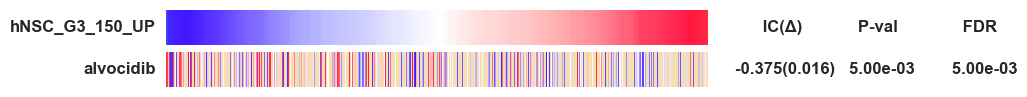

In [80]:
ccal.association.make_association_panel(ccle_hNSC_G3_150_UP, ctrp_drug_sensitivity.ix['alvocidib'],
                                        target_ascending=True, n_jobs=1, n_permutations=200,
                                        n_features=.90,
                                        filepath_prefix='/Users/kateme/discover/results/ccle_sig_ctrp_drug')

### 3.2 Compare CCLE hNSC signature to CCLE drug sensitivity 

<194316> Target (735 cols) and features (305 cols) have 219 shared columns.
<194316> Dropping features with less than 2 unique values ...
<194316> 	Kept 1 features.
<194316> Scoring (n_jobs=1) ...
<194316> Computing 0.95 CI for using distributions built by 30 bootstraps ...
<194316> Computing P-value & FDR by scoring against 200 permuted targets (n_jobs=1) ...
[ForkPoolWorker-85] <194316> 	Scoring against permuted target (0/200) ...
[ForkPoolWorker-85] <194316> 	Scoring against permuted target (1/200) ...
[ForkPoolWorker-85] <194316> 	Scoring against permuted target (2/200) ...
[ForkPoolWorker-85] <194316> 	Scoring against permuted target (3/200) ...
[ForkPoolWorker-85] <194316> 	Scoring against permuted target (4/200) ...
[ForkPoolWorker-85] <194316> 	Scoring against permuted target (5/200) ...
[ForkPoolWorker-85] <194316> 	Scoring against permuted target (6/200) ...
[ForkPoolWorker-85] <194316> 	Scoring against permuted target (7/200) ...
[ForkPoolWorker-85] <194316> 	Scoring against

,score,0.95 moe,p-value (forward),p-value (reverse),p-value,fdr (forward),fdr (reverse),fdr
PD-0332991,-0.340489,0.0605545,0.98,0.02,0.02,0.98,0.02,0.02


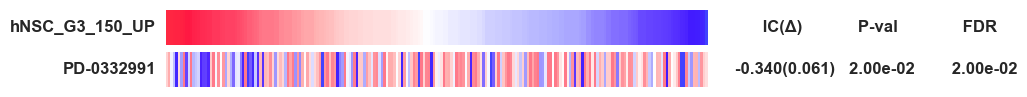

In [81]:
ccal.association.make_association_panel(ccle_hNSC_G3_150_UP,
                                        ccle_drug_sensitivity.ix['PD-0332991'], n_jobs=1, 
                                        n_permutations=200, features_ascending=True, 
                                        n_features=.80, filepath_prefix='/Users/kateme/discover/results/ccle_sig_ccle_drug')

### 3.3 Compare Sanger hNSC signature to Sanger drug sensitivity

<204948> Target (458 cols) and features (355 cols) have 179 shared columns.
<204948> Dropping features with less than 2 unique values ...
<204948> 	Kept 1 features.
<204948> Scoring (n_jobs=1) ...
<204948> Computing 0.95 CI for using distributions built by 30 bootstraps ...
<204948> Computing P-value & FDR by scoring against 200 permuted targets (n_jobs=1) ...
[ForkPoolWorker-107] <204948> 	Scoring against permuted target (0/200) ...
[ForkPoolWorker-107] <204948> 	Scoring against permuted target (1/200) ...
[ForkPoolWorker-107] <204949> 	Scoring against permuted target (2/200) ...
[ForkPoolWorker-107] <204949> 	Scoring against permuted target (3/200) ...
[ForkPoolWorker-107] <204949> 	Scoring against permuted target (4/200) ...
[ForkPoolWorker-107] <204949> 	Scoring against permuted target (5/200) ...
[ForkPoolWorker-107] <204949> 	Scoring against permuted target (6/200) ...
[ForkPoolWorker-107] <204949> 	Scoring against permuted target (7/200) ...
[ForkPoolWorker-107] <204949> 	Scorin

,score,0.95 moe,p-value (forward),p-value (reverse),p-value,fdr (forward),fdr (reverse),fdr
CGP-60474_B,-0.540737,0.0203035,1,0.005,0.005,1,0.005,0.005


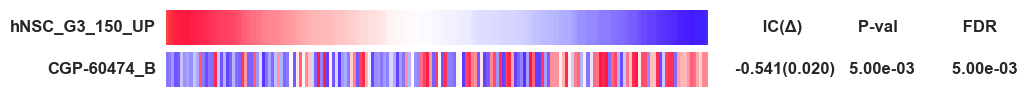

In [109]:
ccal.association.make_association_panel(sanger_hNSC_G3_150_UP, sanger_drug_sensitivity.ix['CGP-60474_B'],
                                        n_permutations=200, features_ascending=True, n_jobs=1,
                                        n_features=.90, filepath_prefix='/Users/kateme/discover/results/sanger_sig_sanger_drug_CGP-60474_B')

<204951> Target (458 cols) and features (355 cols) have 179 shared columns.
<204951> Dropping features with less than 2 unique values ...
<204951> 	Kept 1 features.
<204951> Scoring (n_jobs=1) ...
<204951> Computing 0.95 CI for using distributions built by 30 bootstraps ...
<204951> Computing P-value & FDR by scoring against 200 permuted targets (n_jobs=1) ...
[ForkPoolWorker-109] <204951> 	Scoring against permuted target (0/200) ...
[ForkPoolWorker-109] <204951> 	Scoring against permuted target (1/200) ...
[ForkPoolWorker-109] <204951> 	Scoring against permuted target (2/200) ...
[ForkPoolWorker-109] <204951> 	Scoring against permuted target (3/200) ...
[ForkPoolWorker-109] <204951> 	Scoring against permuted target (4/200) ...
[ForkPoolWorker-109] <204951> 	Scoring against permuted target (5/200) ...
[ForkPoolWorker-109] <204951> 	Scoring against permuted target (6/200) ...
[ForkPoolWorker-109] <204951> 	Scoring against permuted target (7/200) ...
[ForkPoolWorker-109] <204951> 	Scorin

,score,0.95 moe,p-value (forward),p-value (reverse),p-value,fdr (forward),fdr (reverse),fdr
CGP-082996_B,-0.540496,0.0244325,1,0.005,0.005,1,0.005,0.005


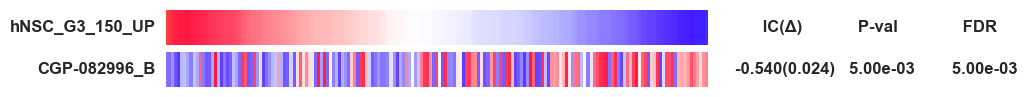

In [110]:
ccal.association.make_association_panel(sanger_hNSC_G3_150_UP, sanger_drug_sensitivity.ix['CGP-082996_B'],
                                        n_permutations=200, features_ascending=True, n_jobs=1,
                                        n_features=.90, filepath_prefix='/Users/kateme/discover/results/sanger_sig_sanger_drug_CGP-082996_B')